In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:/CS ENGG/IN/skillcraft/T2 TITANIC/titanic.csv.csv")  # Make sure 'titanic.csv' is in the same directory


1.BASIC EXPLORATION

In [16]:

print("Basic Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
print(df.describe(include='all'))

print("\nMissing Values:\n")
print(df.isnull().sum())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN             

2.DATA CLEANING

In [17]:


df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns='Cabin', inplace=True)

df.dropna(subset=['Embarked', 'Fare'], inplace=True)

print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())




Missing Values After Cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


3.EDA

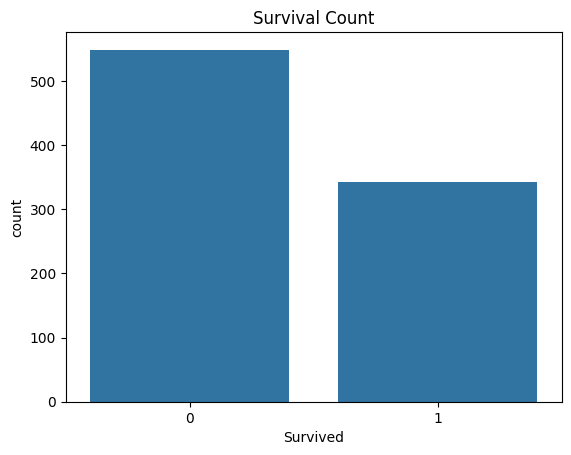

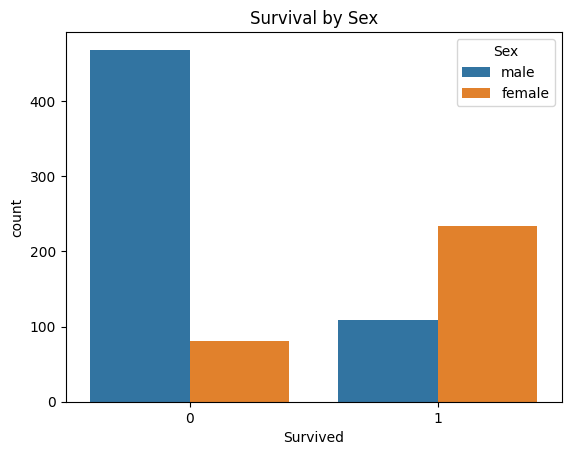

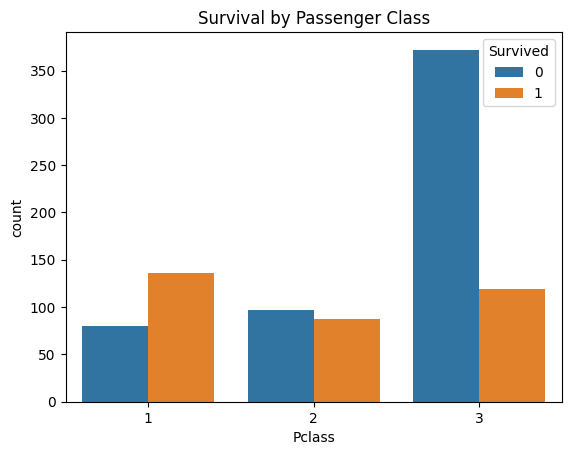

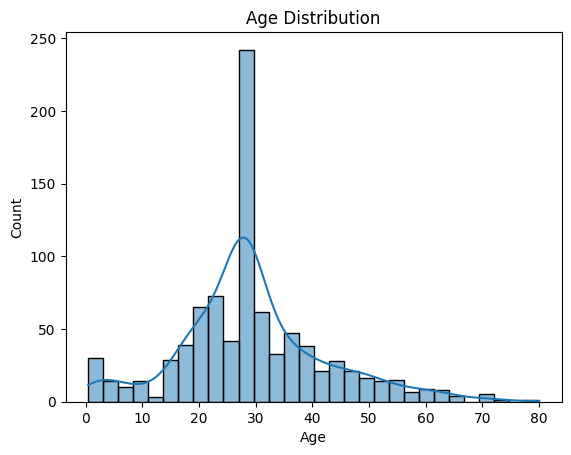

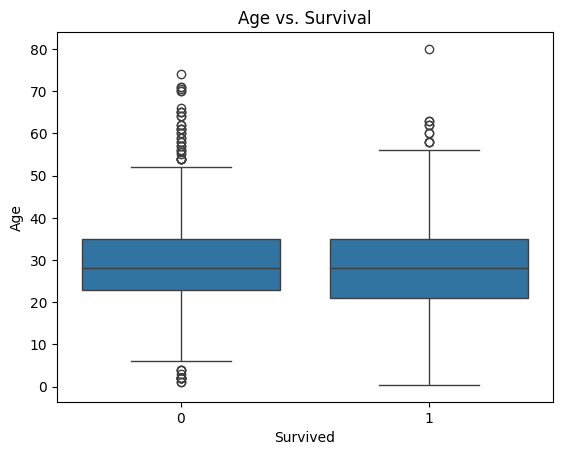

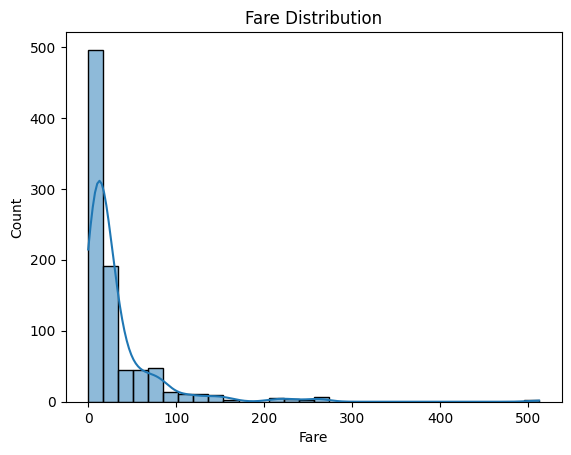

In [18]:
# Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival by Sex
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Sex')
plt.show()

# Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Age vs. Survival
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs. Survival')
plt.show()

# Fare distribution
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()



4.ADDITIONAL INSIGHTS

In [19]:
# Pivot table of survival by sex and class
pivot = pd.pivot_table(df, index='Sex', columns='Pclass', values='Survived')
print("\nSurvival Rate by Sex and Class:\n", pivot)

# Group by Embarked and survival rate
embark_survival = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Point:\n", embark_survival)




Survival Rate by Sex and Class:
 Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Survival Rate by Embarkation Point:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
